In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx


In [2]:
sns.set_style("darkgrid")
# plt.style.context(matplotx.styles.duftify(matplotx.styles.dracula))


In [3]:
#data = pd.read_csv("./ParetoRankCSV/combined_data_pareto.csv")
#data
data = pd.read_csv("combined_data.csv")
data.head()

,Protein,Strain Energy Cutoff,EF1%,EF5%,deltaEF1%,deltaEF5%,Linear Log10 AUC (x10),Delta Linear Log10 AUC (x10),ROC_AUC,Actives,Total Count,deltaAUC
0,VDR-3a2j,No Cutoff,0.435920,3.225806,0.000000,0.000000,1.171234,0.000000,0.440936,1147,513419,0.000000
1,VDR-3a2j,4,0.877193,4.035088,0.441273,0.809281,1.406952,0.235718,0.497745,570,168079,0.056809
2,VDR-3a2j,4.5,1.083591,4.024768,0.647672,0.798961,1.368004,0.196769,0.489612,646,197462,0.048676
3,VDR-3a2j,5.0,0.848656,3.818953,0.412737,0.593147,1.342305,0.171070,0.486711,707,226948,0.045775
4,VDR-3a2j,5.5,0.794702,3.841060,0.358782,0.615253,1.302950,0.131716,0.478476,755,255588,0.037540


In [4]:
# Grouping the data by 'Strain Energy Cutoff' and calculating the mean of the delta values
grouped_data = (
    data.groupby("Strain Energy Cutoff")[
        ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
    ]
    .mean()
    .reset_index()
)

# Display the grouped data
display(grouped_data)


,Strain Energy Cutoff,deltaEF1%,deltaEF5%,Delta Linear Log10 AUC (x10),deltaAUC
0,4,-2.235822,0.081436,0.047308,0.019944
1,4.5,-2.260634,-0.260869,0.019532,0.019411
2,5.0,-2.332914,0.029938,0.016587,0.017321
3,5.5,-2.276798,-0.319140,0.015875,0.014034
4,6.0,-1.142541,0.841184,0.087451,0.017384
5,7.0,-0.708109,0.486520,0.113613,0.018459
6,7.5,-0.792410,0.199891,0.089353,0.016791
7,8.0,0.474583,0.203280,0.076748,0.013494
8,No Cutoff,0.000000,0.000000,0.000000,0.000000
9,Top 10 Pareto Ranks,4.277669,0.075301,-0.374223,-0.097051


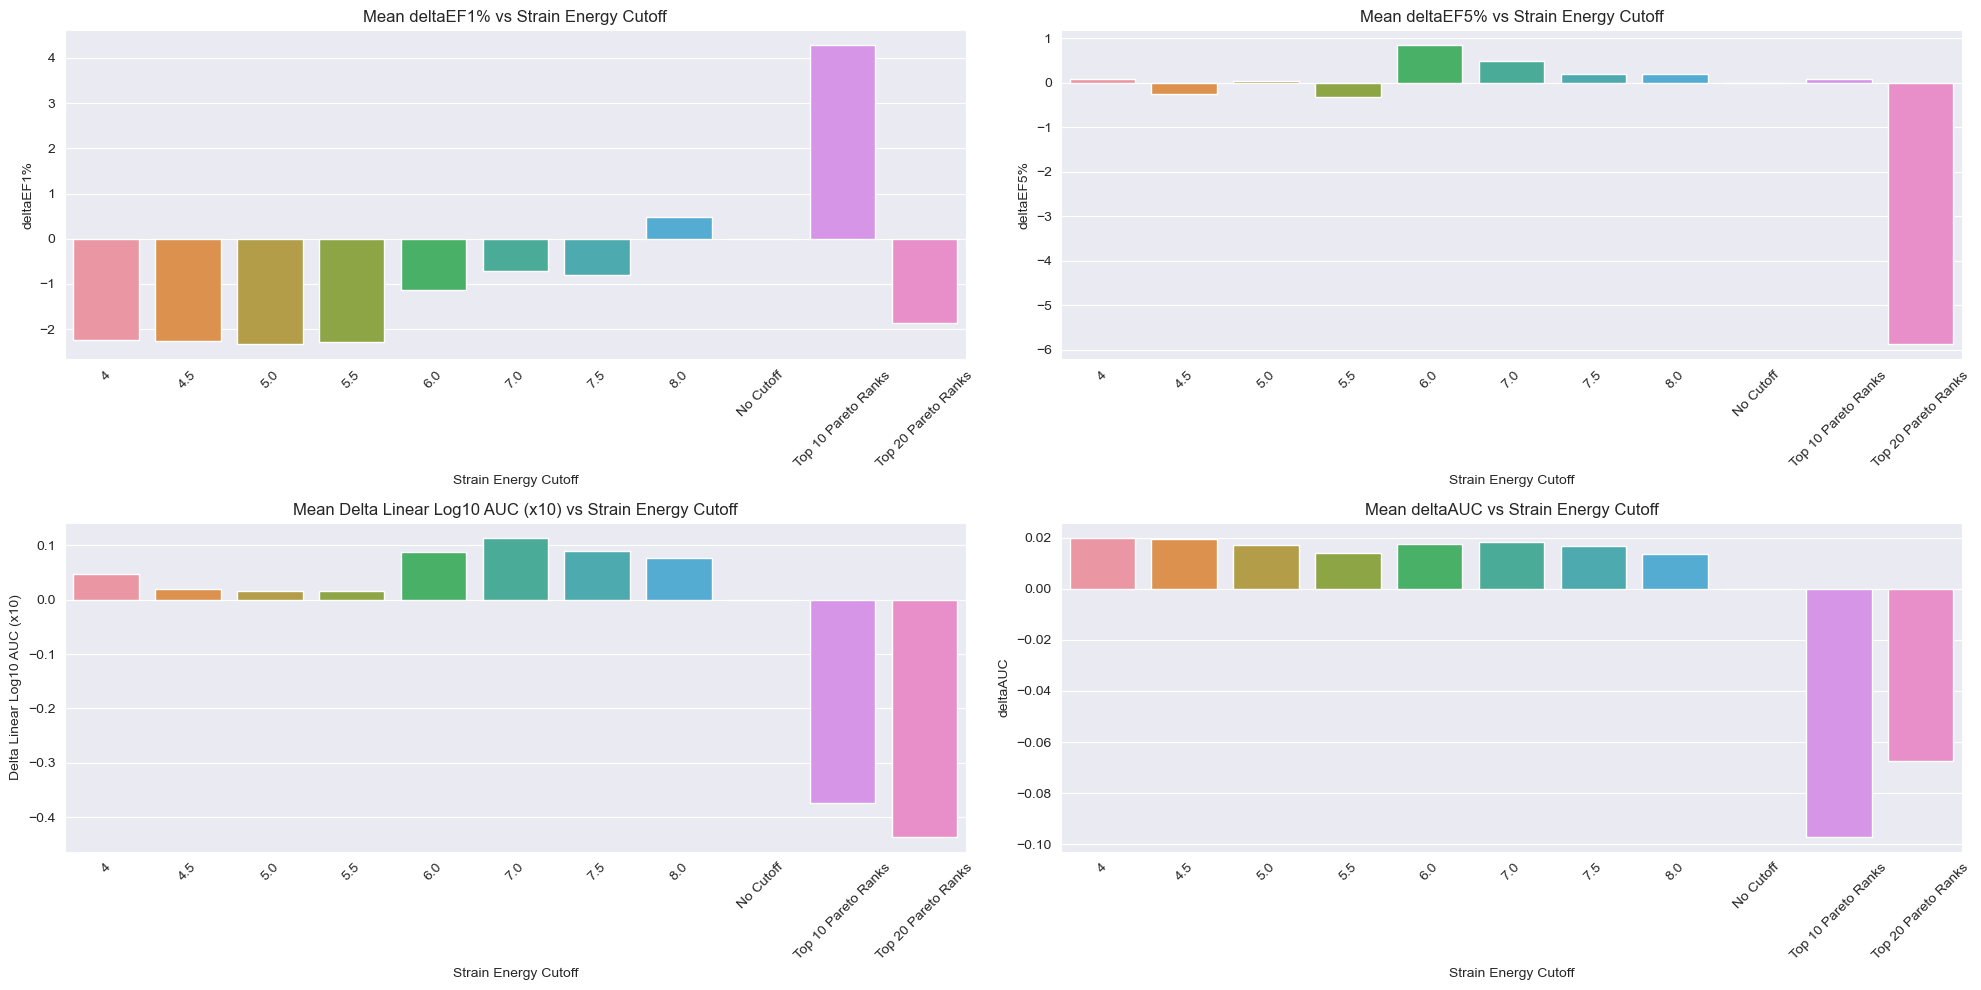

In [5]:
# for index, item_indexed in enumerate tracks the index and the item at that index
# here we are iterating over the columns of the grouped data
plt.figure(figsize=(20, 10))
for i, column in enumerate(
    ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"], 1
):
    plt.subplot(2, 2, i)
    sns.barplot(
        x="Strain Energy Cutoff",
        y=column,
        data=grouped_data,
    )
    plt.xlabel("Strain Energy Cutoff")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.title(f"Mean {column} vs Strain Energy Cutoff")

plt.tight_layout()
plt.show()


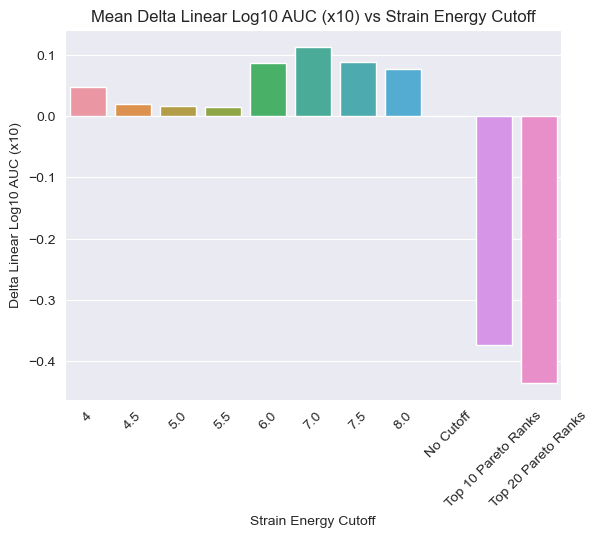

In [6]:
sns.barplot(
    x="Strain Energy Cutoff", y="Delta Linear Log10 AUC (x10)", data=grouped_data
)
plt.title("Mean Delta Linear Log10 AUC (x10) vs Strain Energy Cutoff")
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("Delta Linear Log10 AUC (x10)")
plt.xticks(rotation=45)
plt.show()


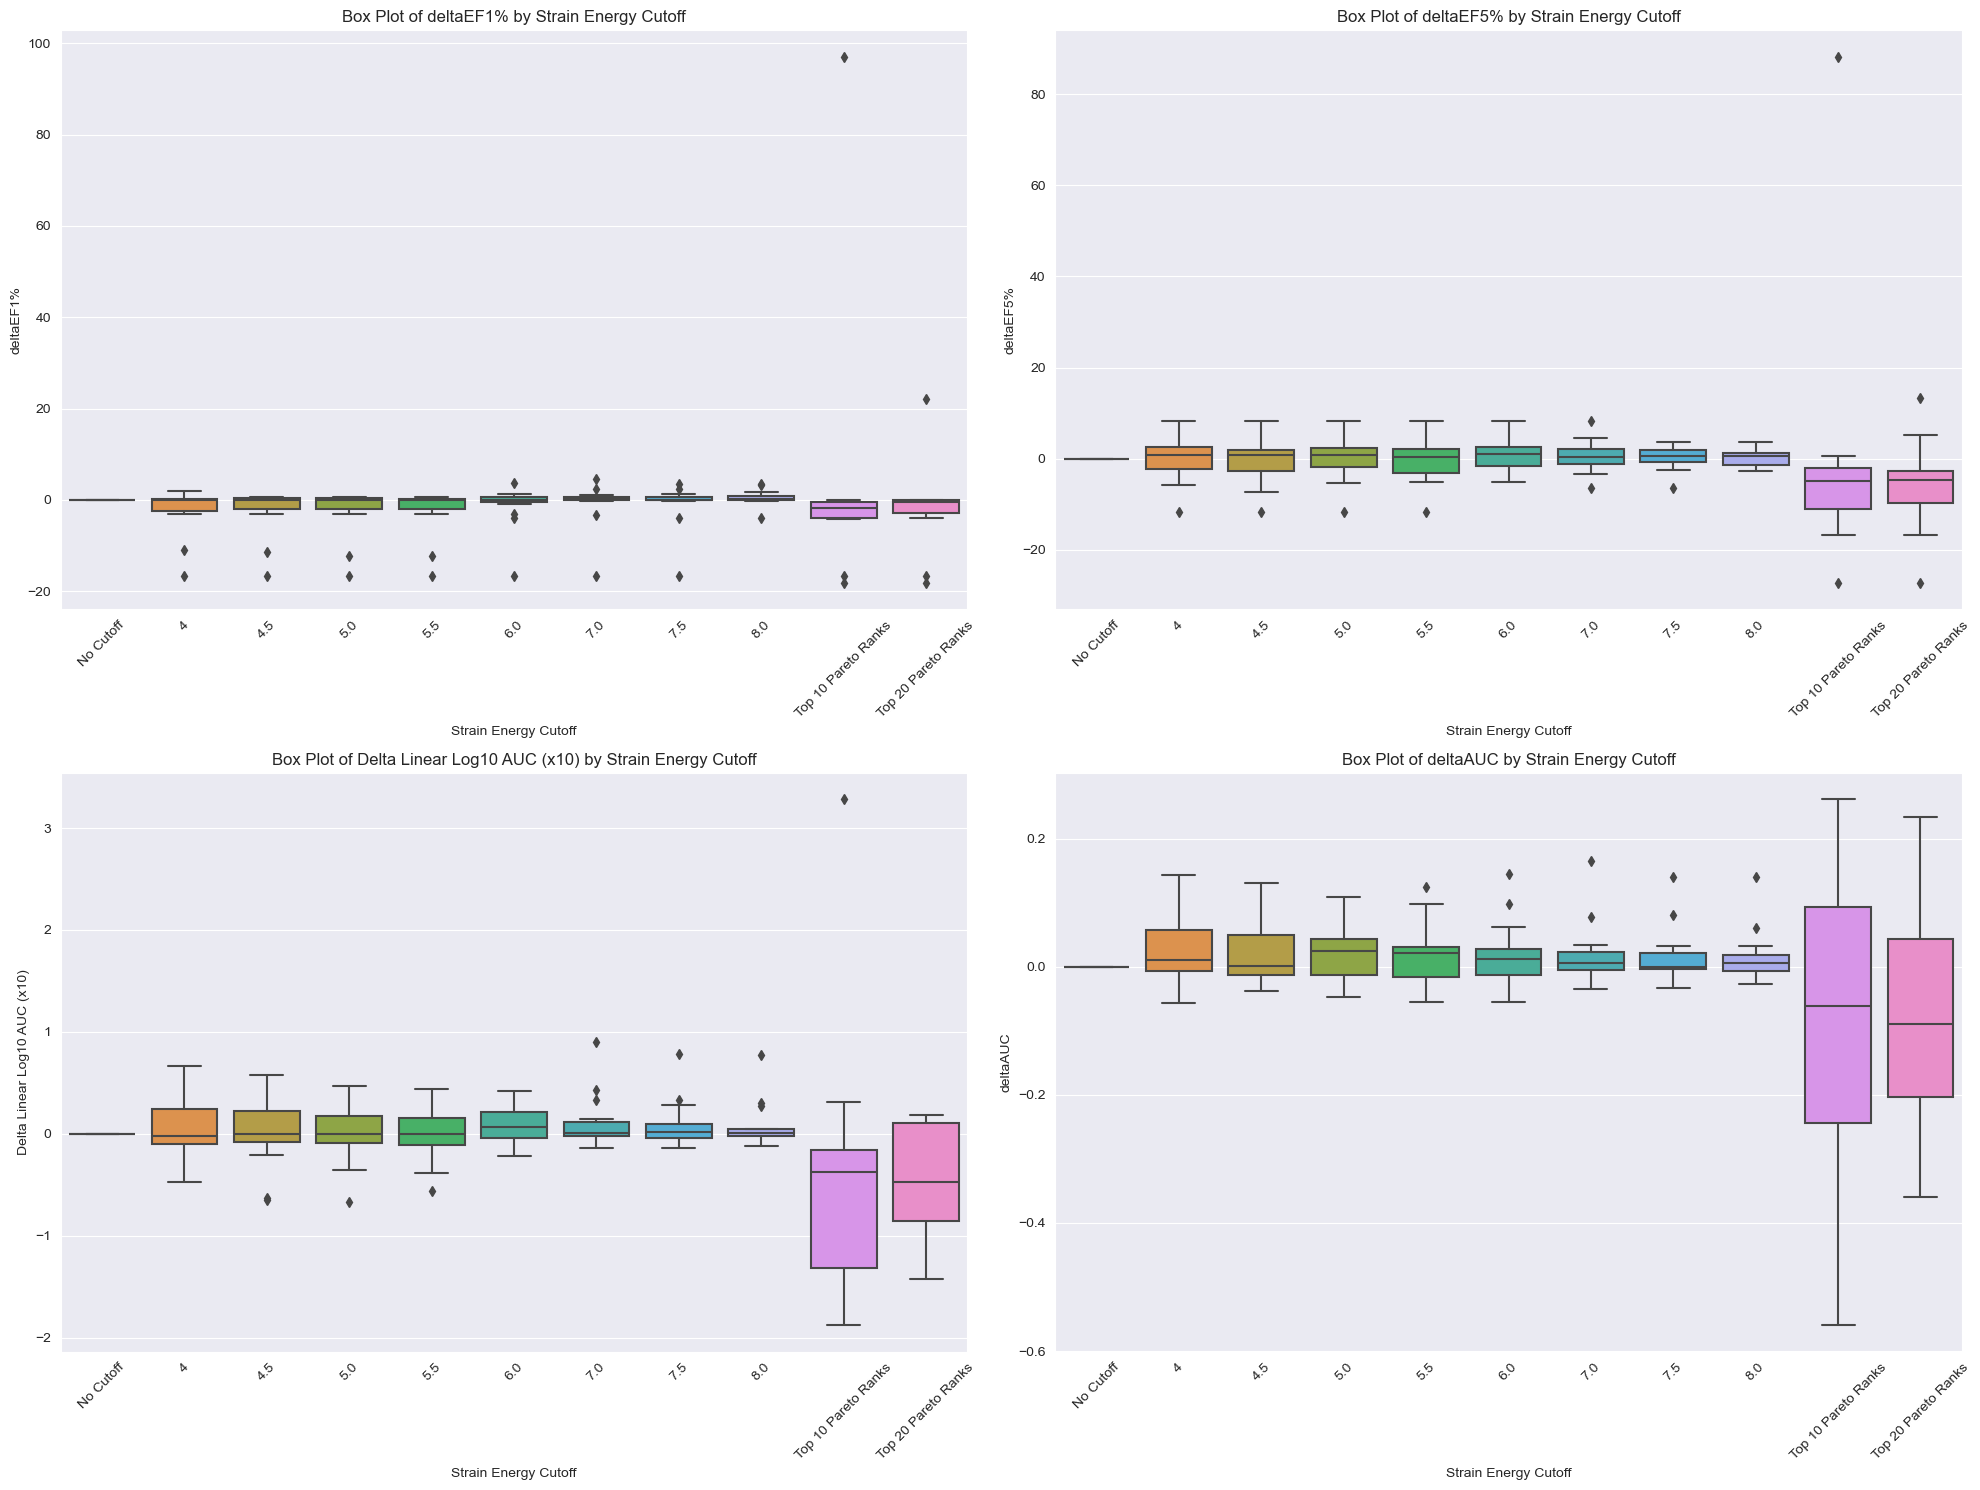

In [7]:
plt.figure(figsize=(20, 15))

# Define the metrics to plot
metrics = ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]

# Creating box plots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Strain Energy Cutoff", y=metric, data=data)
    plt.xticks(rotation=45)
    plt.title(f"Box Plot of {metric} by Strain Energy Cutoff")

# Adjust layout
plt.tight_layout()

# Show the plots without legends
plt.show()


In [ ]:
# Filter the dataset for strain energy cutoff of 4
cutoff_4_data = data[data["Strain Energy Cutoff"] == "4"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 4
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_4_data, ci=None)
plt.title("Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 4")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()


In [8]:
data.columns


Index(['Protein', 'Strain Energy Cutoff', 'EF1%', 'EF5%', 'deltaEF1%',
       'deltaEF5%', 'Linear Log10 AUC (x10)', 'Delta Linear Log10 AUC (x10)',
       'ROC_AUC', 'Actives', 'Total Count', 'deltaAUC'],
      dtype='object')

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_89077/3466769854.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)


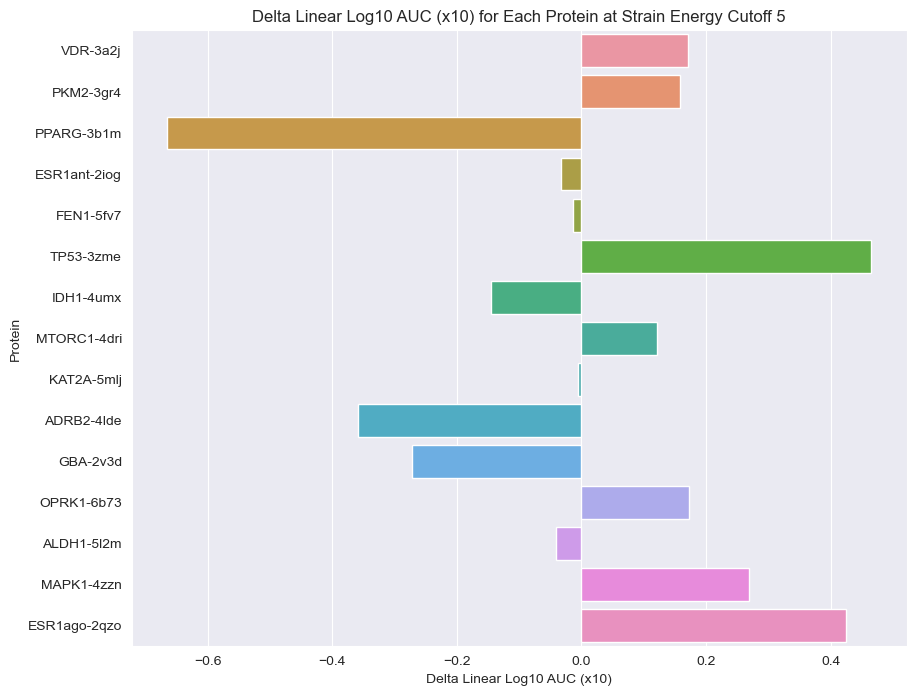

In [11]:
# filter the data for strain energy cut off of 5.0
cutoff_5_data = data[data["Strain Energy Cutoff"] == "5.0"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_5_data, ci=None)
plt.title("Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()



In [ ]:
# Create a barplot plot of deltaEF1% for cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF1%", y="Protein", data=cutoff_5_data, ci=None)
plt.title("deltaEF1% for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("deltaEF1%")
plt.ylabel("Protein")

plt.show()


/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_89077/1163253001.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_5_data, ci=None)


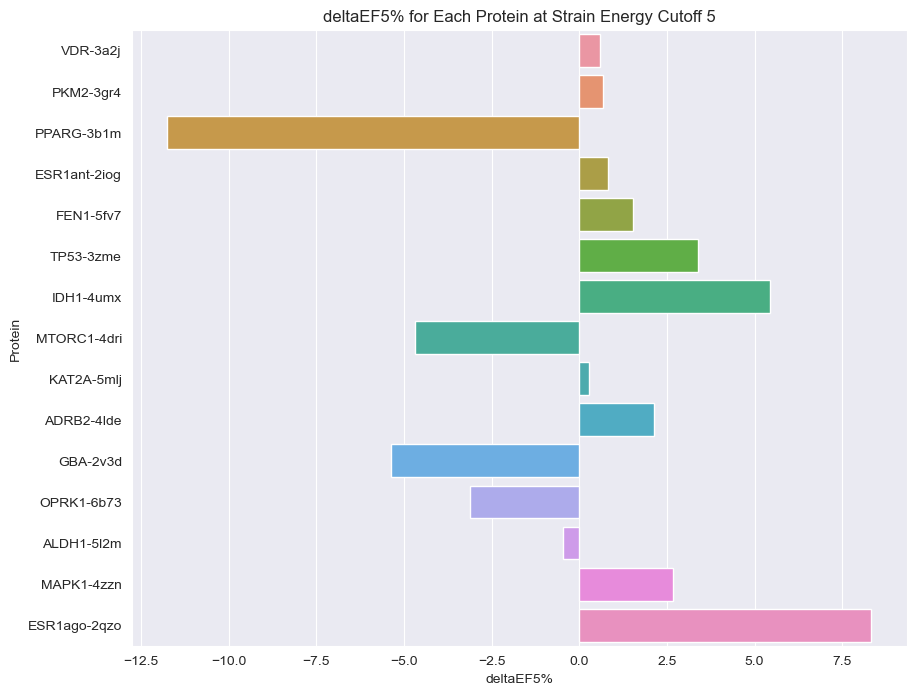

In [12]:
# Create a barplot plot of deltaEF5% for cutoff 5
plt.figure(figsize=(10, 8))
sns.barplot(x="deltaEF5%", y="Protein", data=cutoff_5_data, ci=None)
plt.title("deltaEF5% for Each Protein at Strain Energy Cutoff 5")
plt.xlabel("deltaEF5%")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_89077/3824781533.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_6_data, ci=None)


Text(0, 0.5, 'Protein')

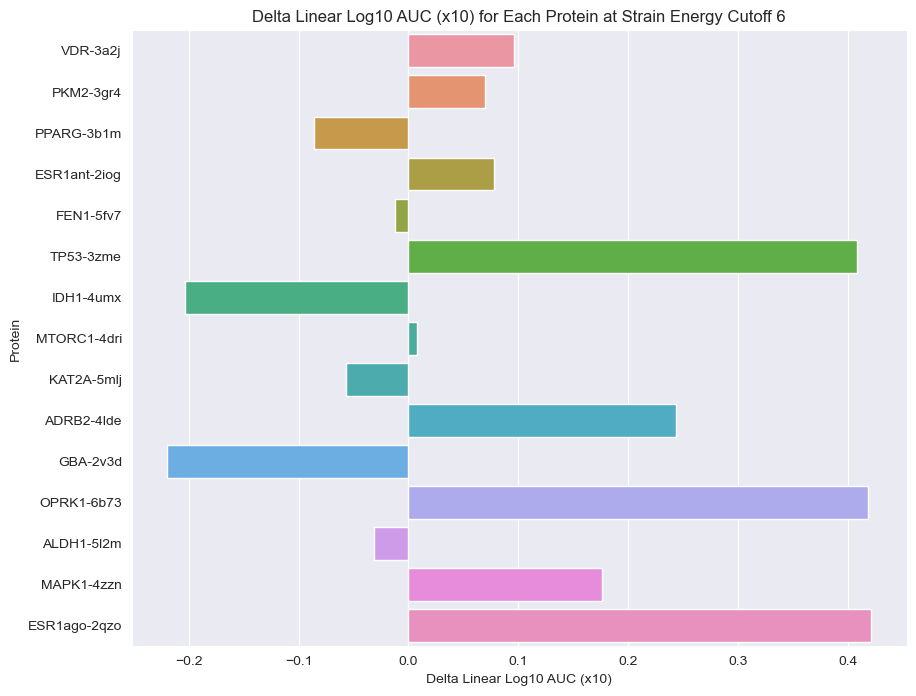

In [13]:

# filter the data for strain energy cut off of 6.0
cutoff_6_data = data[data["Strain Energy Cutoff"] == "6.0"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 6
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_6_data, ci=None)
plt.title("Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 6")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")



/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_89077/1498782889.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_7_data, ci=None)


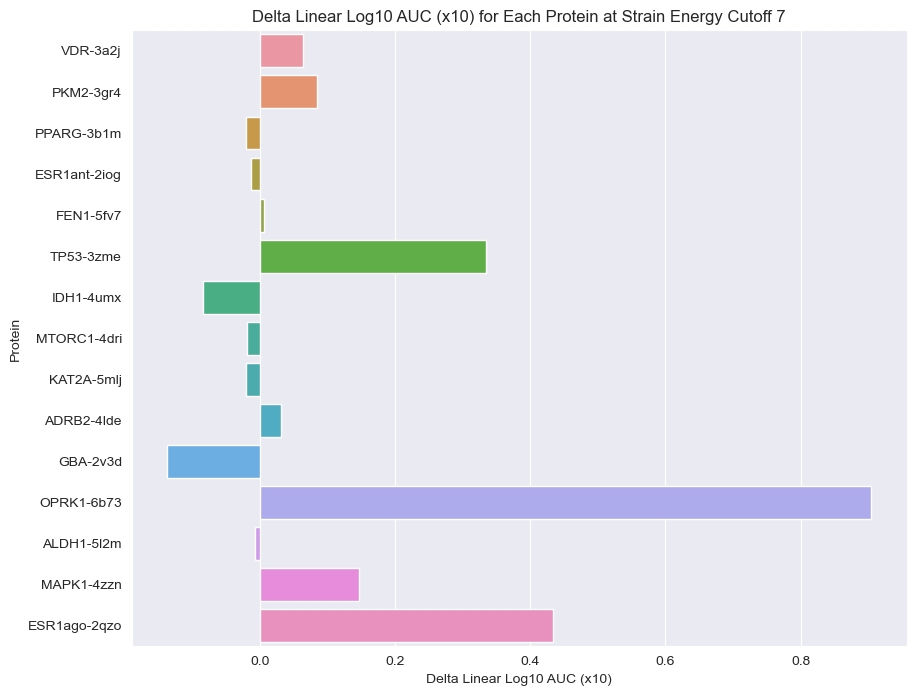

In [14]:
# filter the data for strain energy cut off of 7.0
cutoff_7_data = data[data["Strain Energy Cutoff"] == "7.0"]

# Create a bar plot of Delta Linear Log10 AUC (x10) for each protein at cutoff 7
plt.figure(figsize=(10, 8))
sns.barplot(x="Delta Linear Log10 AUC (x10)", y="Protein", data=cutoff_7_data, ci=None)
plt.title("Delta Linear Log10 AUC (x10) for Each Protein at Strain Energy Cutoff 7")
plt.xlabel("Delta Linear Log10 AUC (x10)")
plt.ylabel("Protein")

plt.show()
